<a href="https://colab.research.google.com/github/TarunTammana/Image-Captioning-Generator/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import random 
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img


In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning directory
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/images")

In [ ]:
resultant="/content/augmentedimages"

In [ ]:
items = os.listdir(directory)

classes=[]
count=0
images = []
labels=[]
for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
    
    i1+=1
    while a!=0:
        img = cv2.rotate(img,lt[random.randint(0,2)])
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
        i1+=1
        labels.append(count)
        if a%2==0:
            img = brightness(img)
            images.append(img)
            cv2.imwrite(f"{resultant}\{k}{i1}.jpg",img)
            i1+=1
            labels.append(count)
        a-=1
    count+=1
images = np.array(images) 
labels = np.array(labels)

adidas.jpg
google.png
ikea.png
amazon.png
lg.png
pepsi.png
microsoft.png
indigo.png


In [ ]:
images.shape

(93, 224, 224, 3)

In [ ]:
# change the model here for alternatives

model = VGG16(weights="imagenet")
for i in model.layers:
    i.trainable =  False

553467096/553467096 [==============================] - 3s 0us/step


In [ ]:
len(model.layers)

23

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model2 = Sequential() 

# adding layers from pre-trained model
for i in range(18):
    model2.add(model.layers[i])

In [ ]:
# adding custum layers
model2.add(Flatten())
model2.add(Dense(512,activation="relu"))
model2.add(Dense(128,activation="relu"))
model2.add(Dense(13,activation="Softmax"))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# model1.summary()
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model2.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
3/3 [==============================] - 40s 13s/step - loss: 18.2227 - accuracy: 0.3226
Epoch 2/100
3/3 [==============================] - 38s 12s/step - loss: 0.8237 - accuracy: 0.9247
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000 call

Reached 99.00% accuracy, so stopping training!!
3/3 [==============================] - 38s 12s/step - loss: 0.0013 - accuracy: 1.0000


In [ ]:
model2.evaluate(images,labels)

3/3 [==============================] - 38s 13s/step - loss: 1.4100e-07 - accuracy: 1.0000


[1.409993757306438e-07, 1.0]

In [ ]:
def predict(i,model,labels):
    path1 = f"{directory}/{i}"
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(model.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3, cv2.LINE_AA)
    plt.imshow(img)

1/1 [==============================] - 1s 557ms/step


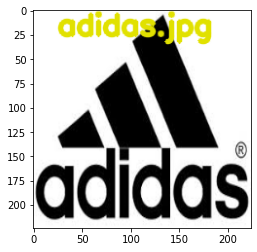

In [ ]:
predict("adidas.jpg",model2,classes)

1/1 [==============================] - 0s 402ms/step


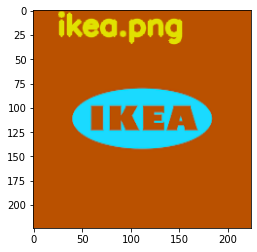

In [ ]:
predict("ikea.png",model2,classes)

1/1 [==============================] - 0s 401ms/step


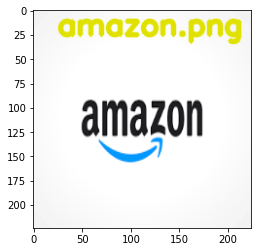

In [ ]:
predict("amazon.png",model2,classes)

1/1 [==============================] - 0s 398ms/step


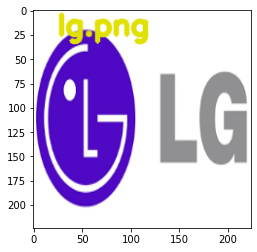

In [ ]:
predict("lg.png",model2,classes)

1/1 [==============================] - 0s 399ms/step


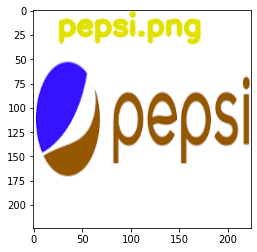

In [ ]:
predict("pepsi.png",model2,classes)

1/1 [==============================] - 0s 400ms/step


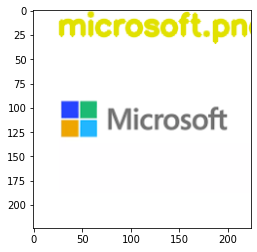

In [ ]:
predict("microsoft.png",model2,classes)

1/1 [==============================] - 1s 539ms/step


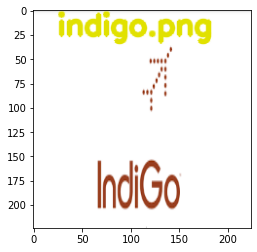

In [ ]:
predict("indigo.png",model2,classes)